# **Initialisation**

## Bibliothèques et modules

In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00


### Présentation des modules :

- `selenium` : indispensable à la réalisation du projet, il permet la navigation sur le web et la collecte d'informations.

- `time` : utile lorsqu'une pause est nécessaire avant l'execution d'un script (ex :  chargement d'une page)

- `collections` : utile pour la manipulation d'objets tel que les listes, les dictionnaire, etc...

- `pandas` : utile pour la manipulation de Dataframe

- L'import de la fonction `Image` est utile pour la fonction de capture d'écran.

In [ ]:
import selenium
import time

import collections
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from IPython.display import Image


## Initialisation et lancement du navigateur

- Démarrage d'une session avec le navigateur Chrome

- Paramétrage du navigateur (options, taille de fenêtre, etc...)

In [ ]:
#Initialisation
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--verbose')

In [ ]:
#Lancement
browser = webdriver.Chrome(chrome_options)
browser.set_window_rect(0,0,1280,840)

{'height': 840, 'width': 1280, 'x': 0, 'y': 0}

## Fonctions utiles : Screenshot, Scroll_to, Next_page

Il s'agit ici de définir trois fonctions qui nous seront utiles dans la suite du projet et qui sont communes aux deux sites visités.

- `screenshot()` : permet de réaliser une capture d'écran de la navigation en cours

- `scroll_to()` : permet de faire défiler la page jusqu'à l'élément web (un bouton) qui nous intéresse. Le paramètre de la fonction est le bouton vers lequel on souhaite se diriger.

- `next_page()` : Nous nous intérressons dans ce projet à un site qui dispose de plusieurs pages contenant chacune une partie des informations à récupérer. Cette fonction permet d'assurer le passage à la page suivante du site lorsqu'elle est appelée.

In [ ]:
def screenshot():
  screenshot = browser.get_screenshot_as_png()
  display(Image(screenshot, width = '700'))

def scroll_to(button, inclu_elem = 'true') :
  if inclu_elem == 'false' :
    browser.execute_script("arguments[0].scrollIntoView(false);", button)
  else :
    browser.execute_script("arguments[0].scrollIntoView();", button)

def next_page(type_activite):
  # ici il faut bien différencier les deux sites, ils ont deux construction de XPATH différentes
  activite=type_activite
  path=''
  #print(activite)
  if activite == "visites" :
    path = "2245e84abf89c1a53e26db2778641b2c"
  elif activite == "restaurants":
    path = "637649d1d5119c90f180d847a573408b"

  try:
    next_button = browser.find_element(by=By.CSS_SELECTOR, value=f'#bridge_next_{path} > span')
  except selenium.common.NoSuchElementException:
    return False

  scroll_to(next_button, 'false')
  time.sleep(3)
  #screenshot()

  #permet de gerer le cas de la dernier page du site
  #(le bouton pour accéder à la page suivante est présent mais non cliquable)
  try :
    next_button.click()
  except selenium.common.ElementClickInterceptedException :
    return False

  time.sleep(3)
  return True

#next_page()

## Navigation Exploratoire

* Commencer la navigation avec `get` et l'URL cible

* Prendre une capture d'écran pour suivre l'évolution de la navigation.

Cette étape simple de la navigation nous permet de vérifier que la connexion au site est bien établie avant de commencer la récupération d'informations.

Avec cette **Navigation Exploratoire**, nous nous intéresserons à la structure du site, et à comment nous pouvons récupérer les informations à partir de cette structure.

In [ ]:
browser.get('https://www.mosl.fr/fr/decouvrir-la-moselle/destination/visiter')

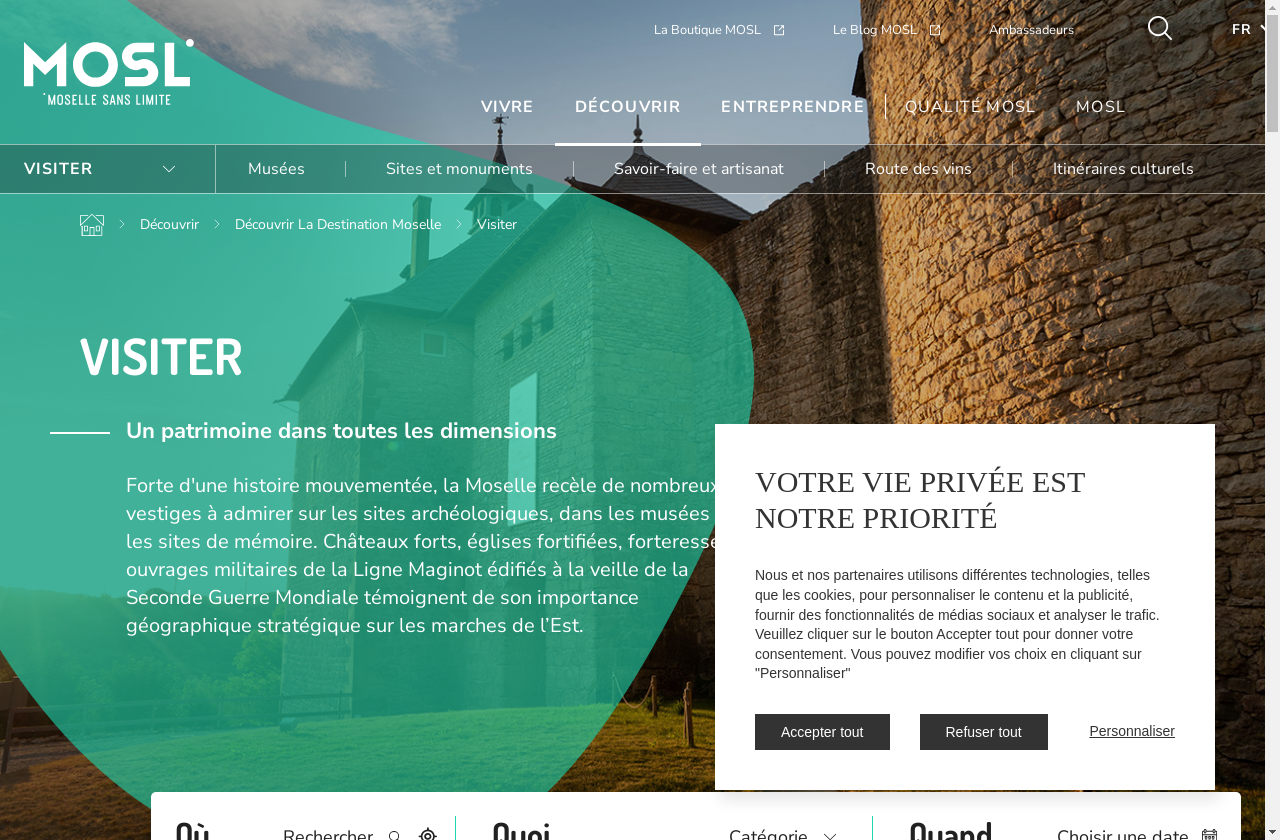

In [ ]:
screenshot()

- Suppression du bouton de "Cookies" :  utile pour avoir une meilleure visibilité lors des captures d'écran.

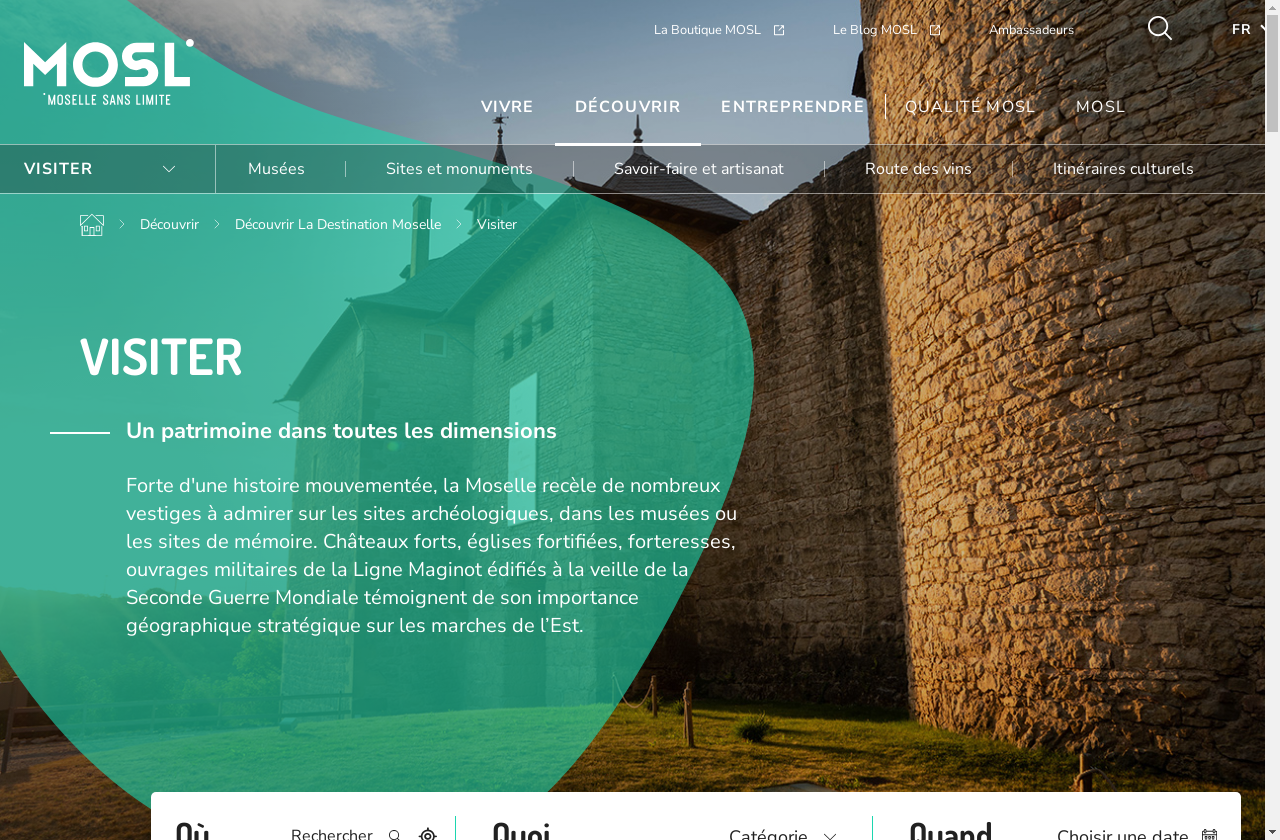

In [ ]:
#Suppression du boutons de Cookies
def accept_cookies_button():
  accept_cookies_button= browser.execute_script('''return document.querySelector('vk-cookie-manager').shadowRoot.querySelector('vk-button')''')
  accept_cookies_button.click()

accept_cookies_button()
screenshot()

Défilement de la page jusqu'aux premières activités

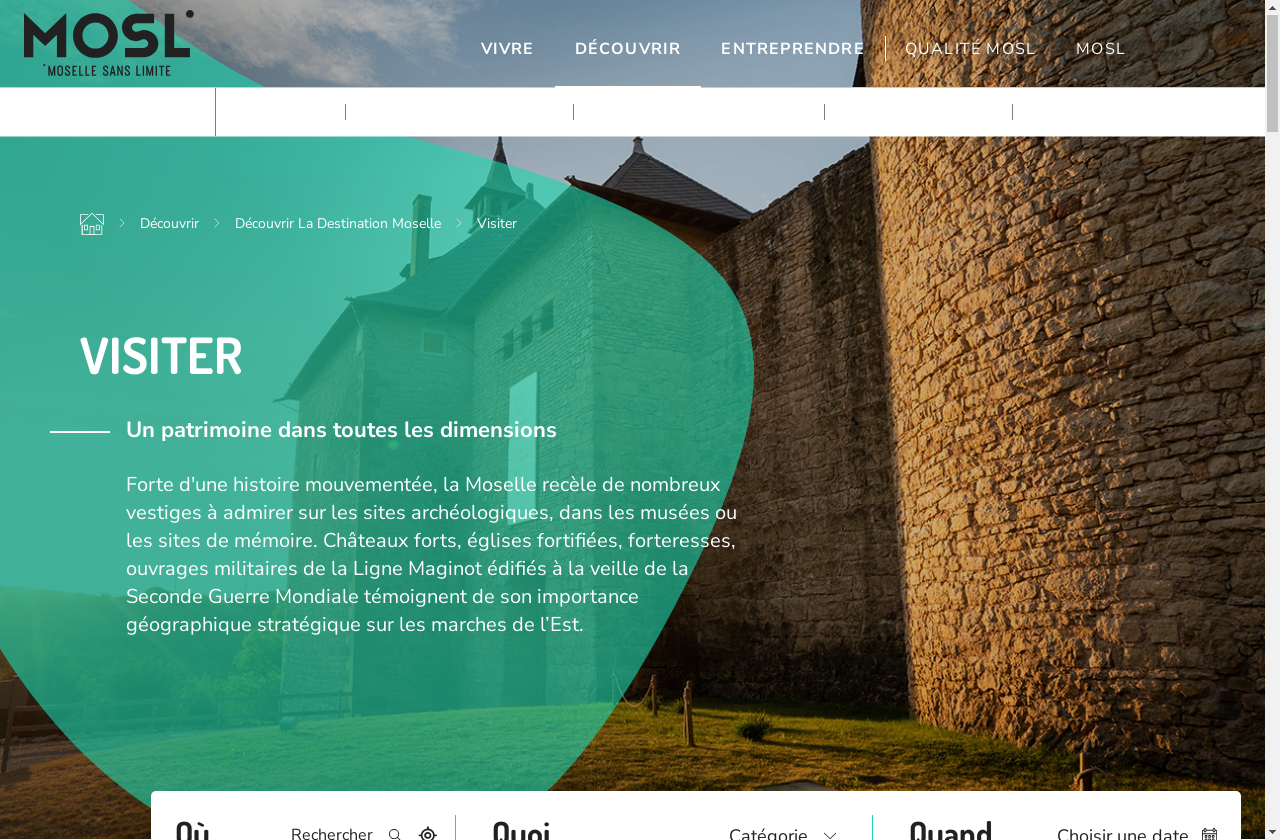

In [ ]:
activite = browser.find_element(by=By.XPATH, value='//*[@id="listeSIT_2245e84abf89c1a53e26db2778641b2c"]/div[1]/article/div[2]/div[2]/h2/a/div/div/span/span')

scroll_to(activite)
screenshot()

Ici, nous pouvons constater que les activités sont contenues dans une listes et chacune d'entre elle est un élément cliquable qui nous enmène sur la page de l'activité.

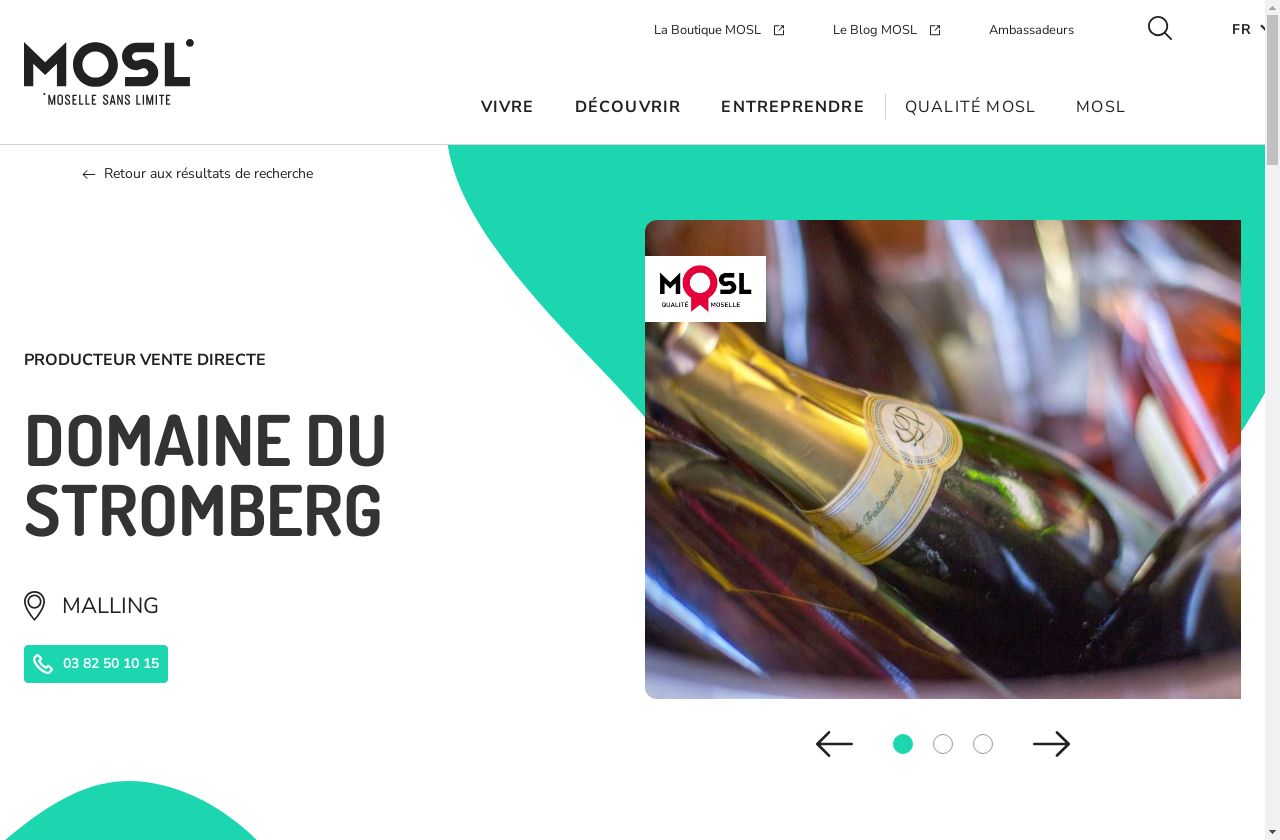

In [ ]:
browser.execute_script("arguments[0].click();", activite)
screenshot()

On se situe maintenant sur la page de l'activité.

Les informations directements accessibles sont les informations générales et les images.

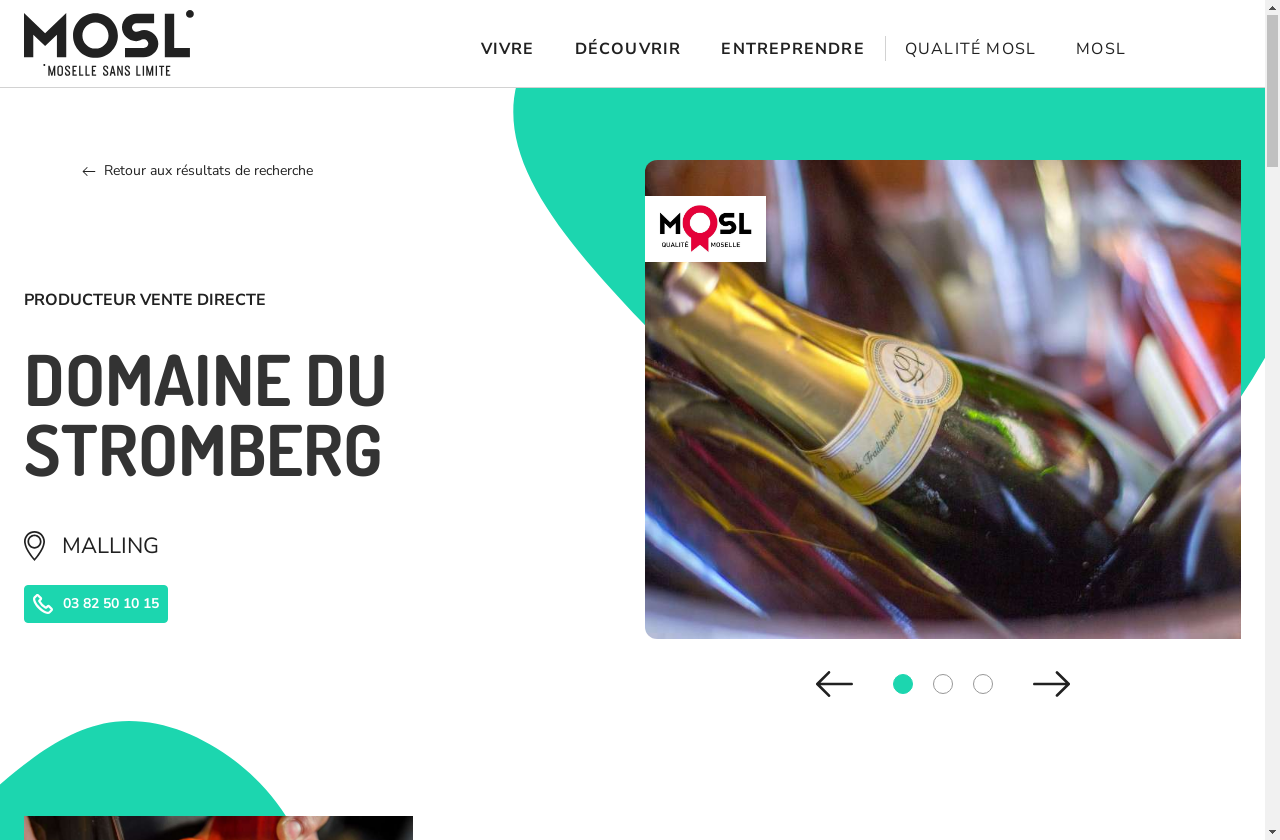

In [ ]:
contact = browser.find_element(by=By.XPATH, value='//*[@id="contact"]/div[2]/ul')

scroll_to(contact)
screenshot()

Il est possible de constater que les informations de contacts sont contenues dans une section en fin de page.

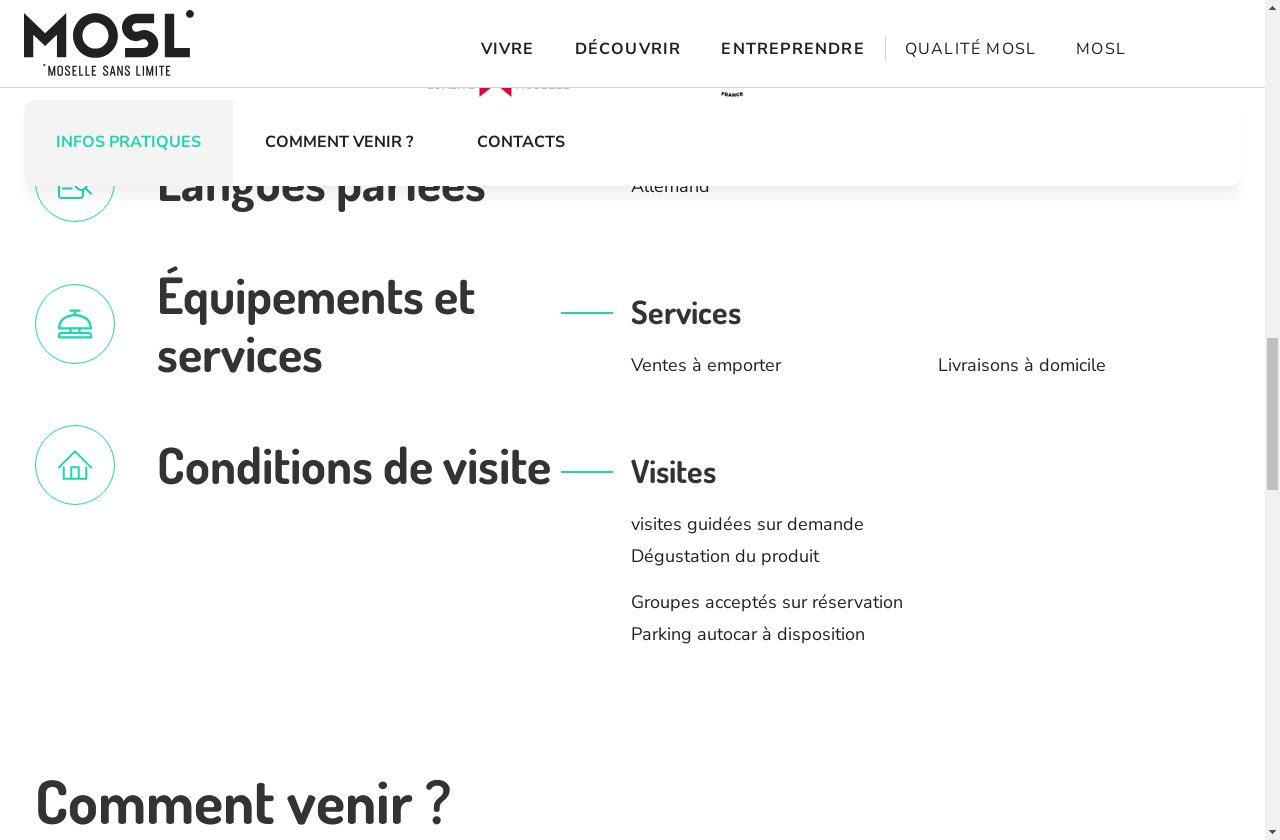

In [ ]:
infos_comp = browser.find_element(by=By.XPATH, value='//*[@id="custom-block-4105"]/div/div[2]/div/div/div/div')

scroll_to(infos_comp)
time.sleep(3)
screenshot()

Nous pouvons voir ici, que les informations (informations complémentaire ici), sont contenant dans des des blocs alignés dans une liste.

Pour les horaires et les prix, la présentations des informations sur le site est similaire.

**Conclusion :**

Nous allons récupérer toutes les informations avec leur chemin XPATH sur la page. En fonction du site sur lequel nous naviguons, ce XPATH est différent. De plus certain éléments ne sont pas toujours présents (les prix et horaires par exemples).

# **Récupération des informations**

Précédement, dans l'onglet **Navigation Exploratoire**, nous avons pu nous intéresser à la structure des différentes pages sur lequelles nous seront amenés à naviguer.

Nous avons ainsi pu nous faire une idée de la manière dont nous allions naviguer sur ces sites et comment nous allions récupérer les informations qui nous intérressent.

Pour se faire, nous utiliserons trois méthodes du package selenium :
- `.find_elements` : C'est une méthode appliquée à l'objet `browser`. Elle permet de récupérer une liste d'éléments qui ont un XPATH, un CSS selector, ou autres méthodes de selection en commun. Nous l'utiliserons notamment pour recupérer l'information de plusieurs blocks d'éléments distincts OU pour vérifier l'existence d'un élément (ex: informations tarifaires).

- `.find_element` : C'est une méthode appliquée à l'objet `browser`. Il permet de récuperer un élément web sur une page en fonction de son XPATH, son CSS selector, sa classe, ou autre moyen de selection.

- `.text` : C'est une méthode appliquée à un élément web. Elle permet de récupérer le texte contenu dans cet élément.

## Fonction de navigation
La première fonction définie dans cette section sera une fonction de navigation : `start_search()`

Etant donné la construction de la page principale du site (détaillée ci-dessus), il est nécessaire de créer une fonction qui permet d'accéder à chacune des activités individuellement afin de pouvoir récupérer les informations qui leurs sont propres. C'est la fonction `start_search()`.

Les paramètres de cette fonction sont :
- `i` : un compteur qui permet d'accéder à chacune des activités d'une page. Ce compteur est nécessaire dès que l'on souhaite récupérer les informations de plusieurs activités et non d'une seule.

- `type_activite` : Ce paramètre permet de modifier le XPATH de recherche des informations en fonction du site sur lequel on se trouve. En effet, il nous a été demandé de récupérer les informations sur deux sites différents : les visites et les restaurants. La construction de ces deux sites est identique, c'est d'ailleurs ce qui nous permet d'utiliser toutes nos fonctions sur ces deux sites. Néanmoins, ils ont un 'identifiant' qui leur est propre et qui est présent dans tous les XPATH. Ce paramètre permet de déterminer cet identifiant en fonction du site. Le paramètre `type_activite` sera réutilisé dans nombre de nos prochaines fonctions.

In [ ]:
def start_search(i, type_activite):

  # ici il faut bien différencier les deux sites, ils ont deux construction de XPATH différentes
  activite=type_activite
  path=''
  #print(activite)
  if activite == "visites" :
    path = "listeSIT_2245e84abf89c1a53e26db2778641b2c"
  elif activite == "restaurants":
    path = "listeSIT_637649d1d5119c90f180d847a573408b"


  search_button = browser.find_element(by=By.XPATH, value=f'//*[@id="{path}"]/div[{i}]/article/div[2]/div[2]/h2/a')
  browser.execute_script("arguments[0].click();", search_button)
  # Wait for the results to load
  time.sleep(3)


#screenshot()

## Fonction de récupération d'information

Avec ces fonctions, nous récupérons l'ensemble des informations relatives à une activité. Par la suite, nous nous intéresserons à la récupération des activités de l'ensemble du site.

Les informations récupérées sont sotckées dans des dictionnaires de la forme :

    dict_info = {"nom de l'information":"information récupérée"}

Si l'information ne peut pas être récupérée pour une activité donnée, sa valeur est une chaine de caractères vide.

### Informations Générales

- La catégorie de l'activité

- Le titre

- Son résumé (s'il est présent)

- Sa description (si elle est présente)

In [ ]:
def get_infos_generales(type_activite) :
  dict_info_gen = {"categorie":"", "titre": "", "resume":"", "description":""}

  test_presence_categorie = browser.find_elements(by = By.XPATH, value=f'//*[@id="detailfiche"]/header/div/div[1]/div[1]')
  if len(test_presence_categorie) !=0 :
    dict_info_gen["categorie"] = browser.find_element(by = By.XPATH, value='//*[@id="detailfiche"]/header/div/div[1]/div[1]').text


  dict_info_gen["titre"] = browser.find_element(by = By.XPATH, value='//*[@id="detailfiche"]/header/div/div[1]/h1').text


  dict_info_gen["resume"]=browser.find_element(by = By.XPATH, value='//*[@id="detailfiche"]/section').text
  dict_info_gen["resume"]=dict_info_gen["resume"].replace("\'", "'")
  dict_info_gen["resume"]=dict_info_gen["resume"].replace("\n", " ")


  # ici il faut bien différencier les deux sites, ils ont deux construction de XPATH différentes
  activite=type_activite
  path=''
  #print(activite)
  if activite == "visites" :
    path = "4105"
  elif activite == "restaurants":
    path = "6068"

  test_presence_description = browser.find_elements(by = By.XPATH, value=f'//*[@id="custom-block-{path}"]/div/div[1]/div/div')
  if len(test_presence_description) != 0:
    dict_info_gen["description"]=browser.find_element(by = By.XPATH, value=f'//*[@id="custom-block-{path}"]/div/div[1]/div/div').text
    dict_info_gen["description"]=dict_info_gen["description"].replace("\'", "'")
    dict_info_gen["description"]=dict_info_gen["description"].replace("\n", " ")

  return dict_info_gen

### Infromations de Contact :

- Le site web relatif à l'activité (du restaurant, du lieu de visite, etc...)

- L'email

- Le numéro de téléphone

- L'adresse de l'activité

In [ ]:
def get_infos_contact() :
  dict_contact ={"site web":"","email":"","telephone":"","adresse":""}
  list_contact = ['home', 'email', 'phone', 'pin']

  for i in range(len(list_contact)) :
    if browser.find_elements(by=By.CSS_SELECTOR, value=f"#contact > div.contact-details > ul > li.contact-details__item.contact-details__item--{list_contact[i]}") != [] :
      info_contact = browser.find_element(by=By.CSS_SELECTOR, value=f"#contact > div.contact-details > ul > li.contact-details__item.contact-details__item--{list_contact[i]}").text

      if i == 0 :
        dict_contact["site web"] = info_contact.split("\n")
        dict_contact["site web"] = ", ".join(dict_contact["site web"] )
      elif i == 1 :
        dict_contact["email"] = info_contact.split("\n")
        dict_contact["email"] = ", ".join(dict_contact["email"] )
      elif i == 2 :
        dict_contact["telephone"] = info_contact.split("\n")
        dict_contact["telephone"] = ", ".join(dict_contact["telephone"] )
      elif i == 3 :
        dict_contact["adresse"] = info_contact.split("\n")
        dict_contact["adresse"] = ", ".join(dict_contact["adresse"] )


  return dict_contact



### Horaires

- les différentes horaires de l'établissement proposant l'activité en fonction des jours de la semaine.

In [ ]:
#Horaires

## Fonction nécéssaire pour la fonction principale 'get_horaires()'
def trad_nom_jour(jour):


  dict_trad = {"monday":"Lundi", "tuesday":"Mardi", "wednesday":"Mercredi", "thursday":"Jeudi", "friday":"Vendredi", "saturday":"Samedi","sunday":"Dimanche"}

  jour_fr = dict_trad[jour]

  return jour_fr

#trad_nom_jour("monday")



def get_horaires() :
  essai = browser.find_elements(by = By.XPATH, value='//*[@id="bridge-hours-table"]/tbody/tr')
  if len(essai) != 0 :

    dict_horaires= {"Lundi":"", "Mardi":"", "Mercredi":"", "Jeudi":"", "Vendredi":"", "Samedi":"","Dimanche":""}
    liste_jours = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]


    ## Récupération d'information
    for jour in liste_jours :
      horaire_jour = browser.find_element(by = By.XPATH, value=f'//*[@id="bridge-hours-table-{jour}"]').text

      jour = trad_nom_jour(jour)
      dict_horaires[jour] = horaire_jour.split("\n")
      ## Mise en forme pour affichage
      dict_horaires[jour] = " et ".join(dict_horaires[jour])


    return dict_horaires






### Informations Complémentaires

Série d'informations complémentaires différentes pour chaque activité. Elles ne sont pas toujours présentes. Ces informations sont diverses et variées, voici quelques exemples :

- La langue parlée

- Les différents aménagements et équipements présents sur le site

- Les conditions de visites

- Etc...

In [ ]:
# Infos complémentaire
def get_infos_complementaire(type_activite) :
  liste_elements = browser.find_elements(by = By.CLASS_NAME, value='fiche-mosl__block-item')
  dict_infos_complementaire={}


  #condition nécéssaire car les information de prix sont aussi comprise dans un 'div' avec pour nom de classe : "fiche-mosl__block-item"
  all_block_tarifs = browser.find_elements(by = By.XPATH, value='//*[@id="custom-block-4113"]')

  #print(len(liste_elements))

  # ici il faut bien différencier les deux sites, ils ont deux construction de XPATH différentes
  activite=type_activite
  path=''
  #print(activite)
  if activite == "visites" :
    path = "4105"

    if len(all_block_tarifs) != 0 :
      num_info_complementaire_max = len (liste_elements)
    else :
      num_info_complementaire_max = len (liste_elements)+1

  elif activite == "restaurants":
    path = "6068"
    num_info_complementaire_max = len (liste_elements)


  for i in range(3,num_info_complementaire_max) :
    elements = browser.find_elements(by = By.XPATH, value=f'//*[@id="custom-block-{path}"]/div/div[{i}]')

    if len(elements) != 0 :
      element = browser.find_element(by = By.XPATH, value=f'//*[@id="custom-block-{path}"]/div/div[{i}]').text
      element = element.split("\n")
      info = element[0]
      element.pop(0)
      dict_infos_complementaire[info]=  ", ".join(element)
      #print(element)

  return dict_infos_complementaire




### Informations Tarifaires

- Prix de l'activité. (Pas toujours présent)

In [ ]:
# Tarif

### IMPORTANT ###
# Sur nos sites, seule certaines pages ont des précisions tarifaires.
#il est donc important de verifier si le block web contenant les informations tarifaires existe.


def get_infos_prix():
  dict_infos_prix={}
  all_block_tarifs = browser.find_elements(by = By.XPATH, value='//*[@id="custom-block-4113"]')
  if len(all_block_tarifs) != 0 :
    liste_informations_prix_site = browser.find_elements(by = By.XPATH, value='//*[@id="custom-block-4113"]/div/div')
    liste_informations_prix =[]

    for info_prix in liste_informations_prix_site :
      info_prix = info_prix.text.split("\n")
      dict_infos_prix['tarifs']=  ", ".join(info_prix)

    return dict_infos_prix


### Images

- L'url des images de l'activité

In [ ]:
# Récupération des liens des images de la page
def get_imgs() :
  dict_img={'images':[]}
  liste_img_res = []
  liste_img_page = browser.find_elements(by=By.XPATH, value='//*[@id="detailfiche"]/header/div/div[2]/div/div/div[1]/div')

  for compteur in range(1,len(liste_img_page)+1) :

    img = browser.find_element(by=By.XPATH, value=f'//*[@id="detailfiche"]/header/div/div[2]/div/div/div[1]/div[{compteur}]/img')
    lien_img = img.get_attribute('src')
    liste_img_res.append(lien_img)
    #print(liste_img_res)

  dict_img['images']=liste_img_res
  return dict_img


#get_imgs()

### Le copyright

In [ ]:
# Il n'existe pas de copyright propre à chaque activité, nous avons donc supposé que le copyright des images était détenu par le site.
#Ainsi, pour toutes les images, nous avons choisis de préciser que leur copyright était celui du site : 'Moselle© 2022.'
def get_copyright ():
  dict_copyright ={'copyright':''}
  copyright = browser.find_element(by=By.CSS_SELECTOR, value='body > div.dialog-off-canvas-main-canvas > div > footer > div > div.container > div > div.footer-menu-legals > div.copyright').text

  dict_copyright ['copyright'] = copyright
  return dict_copyright


## Récupération de toutes les informations

### Informations de l'activité

Il s'agit ici de créer une fonction qui centralise toutes les fonctions de récupération d'informations précédentes.

Etant donné que nous récupérons un dictionnaire par fonction, il faut les regrouper en un seul dictionnaire par activité. Pour cela, nous utilisons la méthode `.update` qui permet de "mettre à jour" un dictionnaire avec un second dictionnaire.

In [ ]:
def get_all_informations(type_activite) :
  dict_infos_activite={}

  #dict_infos_gen = get_infos_generales()
  dict_infos_gen = get_infos_generales(type_activite)
  dict_infos_contact = get_infos_contact()
  dict_horaires = get_horaires()
  dict_infos_comp = get_infos_complementaire(type_activite)
  dict_infos_prix = get_infos_prix()
  dict_img = get_imgs()
  dict_copyright = get_copyright()

  # Nécessaire pour gérer les dictionnaires vide (quand il n'y a pas de tarifs ou d'horaires précisés)
  liste_dict = [dict_infos_gen, dict_infos_contact, dict_horaires, dict_infos_comp, dict_infos_prix, dict_img, dict_copyright]

  for dico in liste_dict :
    if type(dico) == dict :
      dict_infos_activite.update(dico)

  return dict_infos_activite


### Informations de la page

Pour récupérer les informations de toutes les activités de la page, nous utilisons la fonction de navigation `start_seach()`. Elle nous permet de parcourir toutes les activités présentes sur la page principale pour ensuite appliquer la fonction `get_all_informations()` précédente.

In [ ]:
# Recherche de toutes les infos de toutes les activités de la page
def get_all_infos_page(liste_resultats, type_activite):

  # ici il faut bien différencier les deux sites, ils ont deux construction de XPATH différentes
  activite=type_activite
  path=''
  #print(activite)
  if activite == "visites" :
    path = "listeSIT_2245e84abf89c1a53e26db2778641b2c"
  elif activite == "restaurants":
    path = "listeSIT_637649d1d5119c90f180d847a573408b"

  #print(path)
  #Récupération de toutes les activités de la page
  all_page_activites = browser.find_elements(by=By.XPATH, value=f'//*[@id="{path}"]/div/article/div[2]/div[2]/h2/a')
  nombre_activites_page = len(all_page_activites)

  for i in range(1, nombre_activites_page+1):
    start_search(i, type_activite)
    dico_result = get_all_informations(type_activite)
    liste_resultats.append(dico_result)
    print(dico_result)
    print("---------------")
    # On utilise la methode ".back()" qui permet de revenir a la page de navigation précédente
    browser.back()

  #print(liste_resultats)
  return liste_resultats


### Informations du site

Même principe que pour la fonction `get_all_infos_page()`. La fonction de navigation pour parcourir les différentes pages principales est ici : `next_page()`.

Sur chacune de ces pages, nous appliquons ensuite la fonction `get_all_infos_page()`.

In [ ]:
# On recupere ici toutes les infos du site des activités

def get_all_infos_site(lien_site, liste_resultats, type_activite) :
  browser.get(lien_site)
  test = True
  while test == True :
    liste_resultats = get_all_infos_page(liste_resultats, type_activite)
    test = next_page(type_activite)
  #print(liste_resultats)
  return liste_resultats

### Informations de tous les sites

Même principe que précédement. Après avoir d'abord récupéré les informations d'une activité, puis de toutes activités d'une page, et enfin de toutes celles du site à travers les différentes pages, nous nous intéressons ici aux deux sites différents.

L'astuce ici est l'utilisation d'un dictionnaire de la forme :

    dict_site = {"lien du site" : "type_activite"}

  Ce dictionnaire va permettre de définir le paramètre `type_activite` utilisé dans de nombreuses fonctions ensuite.

In [ ]:
def get_all_infos_final():
  liste_resultats = []
  dict_liens_sites = {'https://www.mosl.fr/fr/decouvrir-la-moselle/destination/visiter':"visites",'https://www.mosl.fr/fr/decouvrir-la-moselle/destination/manger':"restaurants"}

  for lien_site in dict_liens_sites :
    print("-----------------")
    print(dict_liens_sites[lien_site])
    print("-----------------")
    liste_resultats = get_all_infos_site(lien_site, liste_resultats, dict_liens_sites[lien_site])

  return liste_resultats

# **Application des fonctions**

Dans cette rubrique, nous appliquons les fonctions de récupération d'informations à différentes échelles.

Si elles nous servent avant tout à vérifier le bon fonctionnement du programme, elle permettent aussi d'avoir une visibilité sur les résultats obtenus.

La fonction `get_all_infos_final()` permet d'atteindre l'objectif de ce projet, à savoir la récupération de toutes les informations des deux sites ciblés.

In [ ]:
#browser.get('https://www.mosl.fr/fr/decouvrir-la-moselle/destination/manger')

#resultats = get_all_infos_page([],"restaurants")

In [ ]:
#lien_site = 'https://www.mosl.fr/fr/decouvrir-la-moselle/destination/visiter?product_codes=&brpa=48'

#resultats =get_all_infos_site(lien_site,[], "visites")

In [ ]:
resultats = get_all_infos_final()

-----------------
visites
-----------------
{'categorie': 'PRODUCTEUR VENTE DIRECTE', 'titre': 'DOMAINE DU STROMBERG', 'resume': "Le domaine s'étend sur les 9 hectares et demi au dessus du Château des Ducs de Lorraine. Ses vins sont régulièrement reconnus au Concours Général du Salon de l’Agriculture, notamment ses pinots gris et auxerrois.", 'description': 'Producteur Vente directe à MALLING : Vin, bénéficiant du label Qualité MOSL, AOC. Ils sont trois associés sur les 9 hectares et demi du coteau du Stromberg, au dessus du Château des Ducs de Lorraine, à Sierck-les-Bains, au cœur du Pays des Trois Frontières, entre France, Luxembourg et Allemagne. Trois éducateurs spécialisés – avec Thierry Caboz et Bernard Petit – qui, sous l’impulsion de Jean-Marie Leisen, fils et petit-fils d’agriculteur et de viticulteur, ont uni leur passion pour des vignes en pente douce vers la Moselle, dans un paysage de carte postale. Les vins du Stromberg sont à l’honneur depuis plusieurs années dans le Gui

## Mise en forme et export des données

Après avoir récupérer toutes les données, il faut les mettre en forme dans un dataframe à l'aide du package pandas.

In [ ]:
df = pd.DataFrame.from_dict(resultats)

df.head()


categorie                                           titre  \
0  PRODUCTEUR VENTE DIRECTE                            DOMAINE DU STROMBERG   
1               ARCHÉOLOGIE  PARCOURS CHAGALL - MUSÉE DU PAYS DE SARREBOURG   
2           ARTS GRAPHIQUES                              VITRERIE SIEBERING   
3  PRODUCTEUR VENTE DIRECTE                               DOMAINE BUZÉA G-C   
4       DÉCORATION - DESIGN                        CÉRAMISTE ANAÏS CHAPPRON   

                                              resume  \
0  Le domaine s'étend sur les 9 hectares et demi ...   
1  Le Parcours Chagall mène le visiteur de la Cha...   
2  L'entreprise de vitrerie et de miroiterie Sieb...   
3  Domaine viticole Incontournable situé à Ancy -...   
4  Désireuse de créer des objets sensibles, Anaïs...   

                                         description  \
0  Producteur Vente directe à MALLING : Vin, béné...   
1  Musée à SARREBOURG, sur le(s) thème(s) Archéol...   
2  Artisan à REYERSVILLER, sur le(s) thème(s) Ind...   
3  Producteur Vente directe à ANCY DORNOT : Cidre...   
4  Artisan à METZ, sur le(s) thème(s) Industriel ...   

                                      site web  \
0          http://www.vin-stromberg-moselle.fr   
1  https://www.sarrebourg.fr/parcours-chagall/   
2                  https://www.vitreriedart.fr   
3                  http://www.domaine-buzea.fr   
4                    https://anaischappron.fr/   

                             email       telephone  \
0      domaine.stromberg@orange.fr  03 82 50 10 15   
1  com.musee.sarrebourg@wanadoo.fr  03 87 08 08 68   
2          bonjour@vitreriedart.fr  03 87 96 19 57   
3           domainebuzea@gmail.com  06 64 64 31 02   
4         anais.chappron@gmail.com  06 33 67 51 23   

                                    adresse    Langues parlées  \
0            21-23 grand rue, 57480 MALLING           Allemand   
1          Rue de la Paix, 57400 SARREBOURG  Anglais, Allemand   
2    16B rue Principale, 57230 REYERSVILLER  Anglais, Allemand   
3  10 rue Raymond Mondon, 57130 ANCY DORNOT   Anglais, Italien   
4    Bliiida, 7 avenue de Blida, 57000 METZ            Anglais   

                             Équipements et services  ... Vendredi Samedi  \
0  Services, Ventes à emporter, Livraisons à domi...  ...      NaN    NaN   
1  Confort, Salle de projection, Bornes Interacti...  ...    Fermé  Fermé   
2                                                NaN  ...      NaN    NaN   
3  Services, Livraisons à domicile, Magasin de vente  ...      NaN    NaN   
4                        Services, Boutique en ligne  ...   Ouvert  Fermé   

  Dimanche                                          Activités  \
0      NaN                                                NaN   
1    Fermé  Sur place, Animation thématique, Atelier pour ...   
2      NaN                                                NaN   
3      NaN                                                NaN   
4    Fermé                                                NaN   

                                              tarifs Type de restaurant  \
0                                                NaN                NaN   
1  Adulte plein tarif : 6 €, Enfant : 0 €, Tarif ...                NaN   
2                                                NaN                NaN   
3                              Groupe : 8 €/personne                NaN   
4                                                NaN                NaN   

  Classement dans un guide Capacité Equipements et services Accueil  
0                      NaN      NaN                     NaN     NaN  
1                      NaN      NaN                     NaN     NaN  
2                      NaN      NaN                     NaN     NaN  
3                      NaN      NaN                     NaN     NaN  
4                      NaN      NaN                     NaN     NaN  

[5 rows x 27 columns]

Enfin, il faut exporter les données. On utilise les méthodes `.to_json` ou `.to_csv` applicables à des dataframes, en fonction du format demandé.

In [ ]:
# Execution à partir de google collab
df.to_json(r'projet_collecte_web_CARVALHO_VIVIER.json')
df.to_csv(r'projet_collecte_web_CARVALHO_VIVIER.csv')

# On peut ainsi les téléchargers à partir de l'onglet fichier sur la gauche.
# La méthode d'export peut être différentes si on execute le code avec un autre environement.

# **Fin du code**

In [ ]:
browser.quit()